### CORE - WRITE RASTER 2-BAND

Step 2 

Mean Height (Lidar elevation tif) and NDVI (high-res imagery) are combined into a single 2-band tif.

Date: 2019-10-18
Author: Eric Pietraszkiewicz

In [9]:
import numpy as np
import os, sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy
import shapely
import descarteslabs as dl
import rasterio as rio
from rasterio.plot import show
from rasterio.plot import show_hist

import geopandas as gpd
# import earthpy as et2
# import earthpy.spatial as es
import pandas as pd

import gdal

import UTC_util_raster
import UTC_util_shp
import UTC_util_mask
import UTC_util_imagery

# Set working directory 
# os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))

mpl.rcParams['figure.figsize'] = (14, 14)
mpl.rcParams['axes.titlesize'] = 20

In [3]:
place = 'Los_Angeles'

data_root='/datadrive/UTC/'
data_path=data_root+place+'/'

tile_resolution = 1 
tile_size = 256
tile_pad = 0
processing_level = None
bands=['red','green','blue','nir'];  # S2, Lx
resolution=tile_resolution  # Lx:15 S2:10

#### LOAD AND INSPECT STUDY AREA

/home/ericp/Notebooks/UTC_util_shp.py:30: FionaDeprecationWarning: Collection.__next__() is buggy and will be removed in Fiona 2.0. Switch to `next(iter(collection))`.
  pol = c.next()


Los_Angeles Los_Angeles
simple polygon
center co-ordinates -118.41176478411877 34.02098813431566


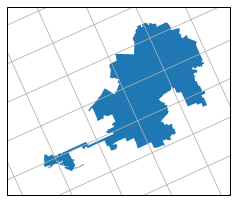

In [4]:
shape, albers, lonlat_crs, place_shp = UTC_util_shp.draw_shp(data_root, place,  figdim=4)

#### GENERATE TILES

number of tiles to cover region 20313


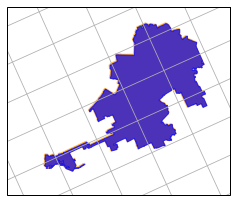

In [5]:
tiles = dl.raster.dltiles_from_shape(tile_resolution, tile_size, tile_pad, shape)
single_tile_id = 4
highlights = {single_tile_id:'green'}
UTC_util_shp.draw_tiled_area(shape, tiles, albers, lonlat_crs, highlights=highlights,  figdim=4)

#### DEFINE PARAMETERS

In [6]:
imgtype, imgsource = 'NAIP', 'naip1'
# imgtype, imgsource = 'SPOT', 'spot2'
# imgtype, imgsource = 'Pleiades', 'plds2'

suffix='A' 
zfill = 5

veg_threshold = 0.1 #NDVI 

binary_threshold = 4

threshold_s = 1
threshold_m = 4
threshold_l = 8

# MASK TYPES
# masktype = 'binary'
masktype = 'class'
# masktype = 'continuous'


imageryID = place+'_'+imgsource+'_'+suffix+'_'+str(resolution)+'m_p'+str(tile_pad)
lidarID = place+'_lidar_'+str(resolution)+'m_p'+str(tile_pad)

In [7]:
params = {'place':place, 'data_root':data_root, 'data_path':data_path,
         'resolution':resolution, 'tile_size':tile_size, 'tile_pad':tile_pad,
         'imgtype':imgtype, 'imgsource':imgsource, 'suffix':suffix, 'zfill':zfill,
         'imageryID':imageryID, 'lidarID':lidarID, 'veg_threshold':veg_threshold, 
         'binary_threshold':binary_threshold, 'threshold_s': threshold_s, 
         'threshold_m': threshold_m,'threshold_l': threshold_l,
         'masktype':masktype}

In [10]:
sample = True # set sample to True if 10% random sample of geography is desired

if sample == False:
    img_list = range(len(tiles['features']))
if sample == True:
    img_list = UTC_util_imagery.gen_randlist(0, tiles, tile_start =0)

for tile in img_list:
    
    outfile = data_path+'combiTif/'+imageryID+'_tile'+str(tile).zfill(zfill)+'.tif'
    try:
        img, out_geo, out_prj = UTC_util_raster.combine_rasters(params, tile) 
        UTC_util_raster.write_multiband_geotiff(outfile, img, out_geo, out_prj, data_type=gdal.GDT_Float32)
    except:
        pass

Sample Set: 2031


/home/ericp/Notebooks/UTC_util_raster.py:42: RuntimeWarning: invalid value encountered in true_divide
  ndvi = (source[3]-source[0])/(source[3]+source[0])


check yo self! tile17139
check yo self! tile18544
check yo self! tile5905
check yo self! tile14867


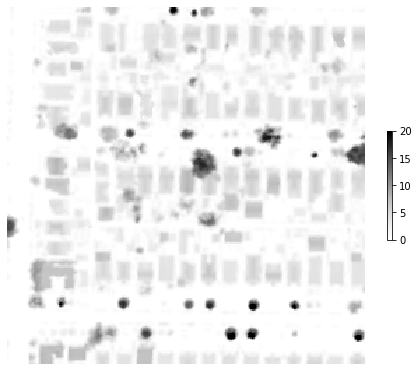

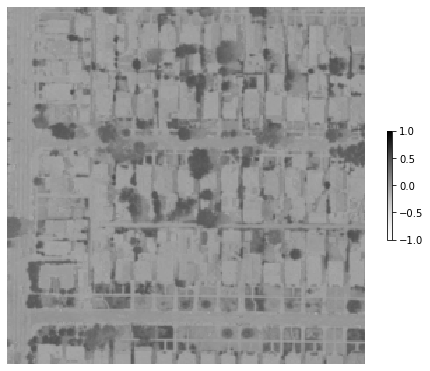

In [11]:
# check the combined tif!
with rio.open(outfile) as src:
    source1 = src.read()
    sourceC = source1.astype(float)
    w = source1[0]
    UTC_util_raster.plotfig(w, 0, 20)
    n = sourceC[1]
    UTC_util_raster.plotfig(n, -1, 1)

-------------------------------------------------------------